## 有瓦遮頭？-Nowhere to shelter——The evolution of street sleeper under public measure and frontline their plight

#### Group Member: Yang Xuzhen, Hu Xuanyu, Fu Lanying, Liang Tong

### Background

To this day, covering their heads with tiles is still a luxury for some people.
Official statistics show that the number of street sleepers in Hong Kong doubled from 787 in 2014 to 1,562 in 2021. Since the government’s official data is based on voluntary registration of street sleepers, this also means that the size of this group is larger than we thought.
The issue of street sleepers has been discussed and concern since the establishment of the Hong Kong government in 1841. Every year, the government promotes a social survey of the real situation of street sleepers, establishes relevant assistance departments and measures, and introduces a series of policies for caring for street sleepers... However, in the past 70 years, Hong Kong has developed into a world-class city and Asia's financial center, the situation of such groups has not been fundamentally improved. Instead, it has become more and more difficult.

### Data processing

#### Data source and Data preparation

All of our data were obtained from the Legislative Council Documents for the years 1997 to 2021. 
By retrieving the keyword “street sleepers”, we filtered out some documents that were not relevant to our topic, and then converted the original PDF files into TXT files by copying and pasting the original text. The TXT files are sorted by year and organized in a Q&A format, which finally transformed into 19 TXT files (since there are some years don't mention “street sleepers”).

#### Text mining

Text mining
We created two text files named “dict” and “停用词表”. The “dict” file contain our custom words, such as the names of the MPs, idioms, etc. The “停用词表” file contain words or phrases that need to be automatically filtered out during subsequent text processing, such as “可以”, “我们”, etc. We used jieba package in Python for Chinese text mining. First, a TXT file for one year was opened, the list of stopwords was filtered out and text segmentation was performed (considering the user-defined dictionary), then keyword extraction and TF-IDF analysis were carried out. We set the value of the number of keywords to 50, conducted TF-IDF calculation on them, and finally generated annual CSV files for subsequent data analysis.The processing is shown below.

In [1]:
import jieba
import jieba.posseg as pseg
import re
import pandas as pd

In [2]:
jieba.load_userdict('dict.txt') 
stopwords = open('../data/停用词表.txt', 'r', encoding = 'utf8').readlines()
stopwords = [w.strip() for w in stopwords]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/xsytv_xx4xs7xpry9986vw2w0000gn/T/jieba.cache
Loading model cost 0.449 seconds.
Prefix dict has been built successfully.


In [3]:
# For word segmentation
tr = []

fr = open('../data/2002.txt','r',encoding='utf-8')
for w in fr.readlines():
    w = w.strip()      
    w = "".join(w.split())
    if not len(w):                    
        continue
        
    outstr = ''                          
    
    w = re.sub(r'[A-Za-z0-9]|/d+','',str(w)) 
    
    seg_list = jieba.lcut(w, cut_all=False)   
    for word in seg_list:
        if word not in stopwords:            
            if word != '\t':                 
                outstr += word
                outstr += " "
            
    tr.append(outstr.strip().split(" "))    

In [4]:
# Write the results
with open('2002.txt','w',encoding = 'utf-8') as file:
    file.write(str(tr))

In [5]:
# Use jieba to do TF-IDF analysis
from jieba import analyse
tfidf = analyse.extract_tags

In [6]:
with open('2002.txt','r',encoding='utf-8') as file:
    texts = file.readlines()
keywords = jieba.analyse.extract_tags(str(texts), topK=50, withWeight=True, allowPOS=('nr','ns','nt','nz','n','vn','v'))
print(keywords)
file.close()

[('服務', 0.42629403498713175), ('計劃', 0.35215594194589145), ('協助', 0.22241427912372091), ('接觸', 0.22241427912372091), ('機構', 0.18534523260310076), ('提供', 0.17429419240632557), ('問題', 0.1668107093427907), ('人數', 0.1482761860824806), ('非政府', 0.13804666697776746), ('精神病', 0.1380382229179845), ('情況', 0.12974166282217053), ('就業', 0.12974166282217053), ('社署', 0.12974166282217053), ('社工', 0.12930862932093024), ('願意', 0.11120713956186046), ('資料', 0.11120713956186046), ('宿舍', 0.10906295217069768), ('患有', 0.10496246006883722), ('入住', 0.09811791741592248), ('社會', 0.09267261630155038), ('幫助', 0.09267261630155038), ('轉介', 0.09267261630155038), ('局長', 0.09267261630155038), ('主體', 0.09267261630155038), ('答覆', 0.09267261630155038), ('推行', 0.08462858416632559), ('政府', 0.07792554770886823), ('進行', 0.0741380930412403), ('評估', 0.0741380930412403), ('選擇', 0.0741380930412403), ('經濟', 0.0741380930412403), ('外展', 0.0741380930412403), ('考慮', 0.0741380930412403), ('繼續', 0.0741380930412403), ('登記', 0.074138093041

In [7]:
df = pd.DataFrame(keywords)
output = df.to_csv('../output/topic_output.csv')Data processing results

Data processing results
Based on these CSV files (i.e. the results of TF-IDF), through eye-checking, we summarized the topic words and the main issues discussed in each year. Depending on the context of the era, the issues discussed for street sleepers varied and are accompanied by some specific words. Therefore, according to the text analysis results, we will elaborate our thinking and discovering in the following three dimensions.

After text mining of the minutes and agenda of meetings of the Legislative Council of the Hong Kong Special Administrative Region from 1997 to 2021, it is concluded that the government conducted some public policy discussions during 1997 to 2021. This section will analyze the public policies and answer the research questions raised before.
From the themes in text mining, it can be seen that the three-year action plan was frequently mentioned in the legislative Council agenda and meetings during 2001-2002, which was also the period when the plan was formally proposed and implemented. Project R has been mentioned since 2015. In the 2014 Policy Address, the Chief Executive of Hong Kong announced the implementation of the pilot project in Sham Shui Po and Yuen Long 

In [1]:
import jieba
import jieba.posseg as pseg
import re

In [2]:
jieba.load_userdict('dict.txt') ##自定义词库
stopwords = open('../data/停用词表.txt', 'r', encoding = 'utf-8').readlines()
stopwords = [w.strip() for w in stopwords]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YANGXU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.669 seconds.
Prefix dict has been built successfully.


In [3]:
# For word segmentation

tr = []

fr = open('../data/three_year_policy.txt','r',encoding='utf-8') #The custom dictionary
for w in fr.readlines():
    w = w.strip()      
    w = "".join(w.split())
    if not len(w):                    
        continue
        
    outstr = ''                        
    
    w = re.sub(r'[A-Za-z0-9]|/d+','',str(w)) 
    
    seg_list = jieba.lcut(w, cut_all=False)   
    for word in seg_list:
        if word not in stopwords:            
            if word != '\t':                 
                outstr += word
                outstr += " "
            
    tr.append(outstr.strip().split(" "))    

In [4]:
# Write the results
with open('three_year_policy_cleaned.txt','w',encoding = 'utf-8') as file:
    file.write(str(tr))

In [6]:
# Use jieba to do TF-IDF analysis
from jieba import analyse
tfidf = analyse.extract_tags

In [7]:
with open('three_year_policy_cleaned.txt','r',encoding='utf-8') as file:
    texts = file.readlines()
keywords = jieba.analyse.extract_tags(str(texts), topK=20,withWeight=True, allowPOS=('nr','ns','nt','nz','n','vn','v'))
print(keywords)
file.close()

[('服務', 0.8648129682948935), ('露宿', 0.6621904549404255), ('社署', 0.42392792563475173), ('綜合', 0.28827098943163115), ('計劃', 0.25435675538085106), ('機構', 0.20348540430468082), ('援助', 0.17543241110282268), ('收容', 0.15016188207455317), ('非政府', 0.12629801446902128), ('提供', 0.1262396765921702), ('協助', 0.11869981917773048), ('撥款', 0.11869981917773048), ('慈善', 0.10547646360817022), ('資助', 0.10174270215234041), ('協會', 0.10174270215234041), ('宿舍', 0.09978099879446808), ('入住', 0.08976745635924824), ('社會', 0.08478558512695035), ('有關', 0.08478558512695035), ('輔導', 0.08478558512695035)]


In [8]:
import pandas as pd
keywords
df = pd.DataFrame(list(keywords))
df
# df.transpose()
# df.to_csv('three_year_policy.csv')

,0,1
0,服務,0.864813
1,露宿,0.662190
2,社署,0.423928
3,綜合,0.288271
4,計劃,0.254357
5,機構,0.203485
6,援助,0.175432
7,收容,0.150162
8,非政府,0.126298
9,提供,0.126240


In [9]:
df.iloc[::-1, 0]

19     輔導
18     有關
17     社會
16     入住
15     宿舍
14     協會
13     資助
12     慈善
11     撥款
10     協助
9      提供
8     非政府
7      收容
6      援助
5      機構
4      計劃
3      綜合
2      社署
1      露宿
0      服務
Name: 0, dtype: object

In [10]:
import matplotlib.pyplot as plt

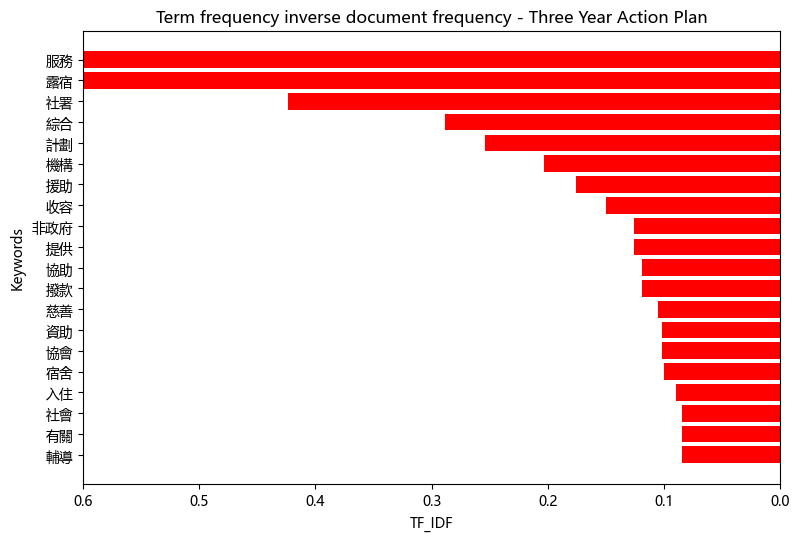

In [26]:
plt.figure(figsize=(9,6),dpi=100)
plt.barh(df.iloc[::-1, 0], df.iloc[::-1 , 1],color='r')
plt.rcParams['font.sans-serif']=['Microsoft YaHei','SimHei']

plt.xlabel('TF_IDF')
plt.ylabel('Keywords')
plt.title('Term frequency inverse document frequency - Three Year Action Plan')

from matplotlib.pyplot import MultipleLocator

x_major_locator=MultipleLocator(0.1)

ax=plt.gca()

ax.xaxis.set_major_locator(x_major_locator)

plt.xlim(0,0.6)
plt.gca().invert_xaxis()#for data viz

In [ ]:
##world clound

In [1]:
# import
import jieba
import wordcloud


import imageio
mk = imageio.imread("香港.png")
# print(type(mk))


w = wordcloud.WordCloud(width=1000,
                        height=700,
                        background_color='white',
                        font_path='msyh.ttc',
                        mask=mk,
                        scale=15,
                        colormap='gray',
                        stopwords={'為','露宿'})


f = open('守望計劃_cleaned.txt',encoding='utf-8')
txt = f.read()
txtlist = jieba.lcut(txt)
string = " ".join(txtlist)


w.generate(string)

# output the word cloud
w.to_file('output_R1.png')


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YANGXU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.641 seconds.
Prefix dict has been built successfully.


Three-year action plan refers to many keywords including Street Sleepers Integrated Service Team, social welfare department (SWD), Grants, dormitories, counseling and etc. Project R refer to many regional plans especially for Sham Shui Po District, and keywords including Buildings, business owners, social workers.

#### 冇瓦遮頭——The Frontline of public measures

Text mining of the minutes of legislative Council meetings from 1997 to 2021 found that among the discussions on street sleepers, related topics such as the government washing streets to evict them, blockading stadiums, erecting barriers and moving sleeping centres were mentioned 10 times. And it mainly took place between 2010 and 2017. 2012 was the year with the most mentions of such actions. Since 2012, councilor have used 'confrontational actions' to describe government agencies' treatment of rough sleepers at questions in the Legislative Council in the years since. According to the TF-IDF of these related texts, cleaning up the finances, evicting street sleepers and closing gym are the top 3 unfriendly actions taken by the government.

Another frequent issue is accommodation. We conducted a topic modeling of all references to street sleepers in legislative Council minutes since 1997 and found that housing was one of the most frequently mentioned issues about street sleepers.
The government has mentioned 有瓦遮頭since 1997. In this 24 years Hong Kong government has indeed mentioned many policies about an outlier provide beds: according to the arrangement of the director-general of the Labour office in 2017, has 630 to provide homeless people as a transit point for around six months of temporary accommodation. However, as the councilor said that only 80 per cent of government-provided accommodation is occupied because the fluctuation beds were kept many elderly people out

The attack of the cold is also a long-term problem mentioned in more than 20 years. Under the existing mechanism, temporary shelter centers are only allowed to open when tropical cyclone Warning No. 8 or above, landslip warning, red/black rainstorm warning, cold/very hot weather warning is in force or when a major fire is in force. But those street sleepers face the cold due to a lack of protective gear. The cases of septuagenarians and Vietnamese sailors who froze to death in the street were mentioned in the legislative Council in 2012 and 2017 respectively.
It seems to imply that on the one hand, the government has put forward many measures, but on another hand, the street sleepers are also subjected to some unfriendly treatments from the government.

#### 瓦喺边度?——The plight of the homeless

According to the Hong Kong government's response records, the size of homeless reached an inflection point in 2007. Between 1998 and 2007, the number of homeless people continued to fall from 1,026 to 327. However, after that, the quantity of street sleepers keeps increasing from 374 in 2008 to 1,500 in 2020 . Based on a NGO's study in 2021, the latest number of homeless has risen to 1,532, reaching a twenty-three year high.

In late 2019, riot police officers conducted a crime reduction sweep in Tong Zhou Street Park, removing homeless people from the park and clearing away their belongings without prior notice. After that, 14 of the homeless involved filed claims for small amounts of money. As of this year, only 9 people continue to seek compensation due to the death or imprisonment of some of the homeless. However, the government described the eviction as “clearing the area in the usual way” and rejected the claims. It is obvious that there is no legislation or policy to protect the basic rights of homeless people in Hong Kong, and they are not even protected by the fundamental right to housing. The government seems to be using this indifferent approach to tell the homeless that if you cannot even feed yourself, you don't belong here and we won't offer you a full set of help or sympathy. The outbreak of COVID-19 has exacerbated the plight of street sleepers. The government has urged people to keep social distance and stay at home during the epidemic, but most street sleepers have nowhere to go but open spaces, which increases their risk of exposure to the virus. Hong Kong media reported that some lawmakers and religious groups had suggested the government open temporary shelters to accommodate street sleepers during the epidemic, but they were rejected. A number of government departments are concerned about the risk of spreading the virus due to the gathering of people and say street sleepers are not eligible for temporary shelters.

The rising number of street sleepers reflects the ineffectiveness of the government's support projects since 2008. The evictions that have been occurring since 2012, as well as the establishment of thresholds for shelters and cold shelters, are indicative of the government's implicit pressure on the rough sleeper community. The eviction of street sleepers has not removed them from society; on the contrary, the size of homeless have grown larger. For instance, government evictions have increasingly marginalized the places where street sleepers operate, making it more difficult for service agencies to find and access street sleepers, and thus failing to provide timely help and services. To effectively deal with the issue of street sleepers, the government must stop the practice of violent evictions and develop homeless-friendly policies and address their basic needs such as housing, mental health, work and socialization.

#### Discussion and conclusion

The present project examined what are the topics and keywords discussed in the Hong Kong Legislative Council on the street sleeper policy each year. The empirical evidence is generated from a text-mining analysis of agenda document for the Public Legislative Council. Several findings are noteworthy.
Homeless has been a fairly marginal social issue within Hong Kong’s urban context. This project chooses street sleepers in one of homeless categories as analyzed object. Our project via text mining from the Hong Kong Legislative Council Street Sleepers Conference from 1997 to 2021 and conduct the term frequency inverse document frequency (TF-IDF) table. From eye tracking and manually decision, we have summarized the discourse on the legislative Council's agenda about rough sleepers in three dimensions. 

From Public Policy, “Three-year action plan” refers to many keywords including Street Sleepers Integrated Service Team, social welfare department (SWD), Grants, dormitories, counseling and etc. “Project R” refer to many regional plans especially for Sham Shui Po District, and keywords including Buildings, business owners, social workers. From (三年計劃) （守望計劃）. Judging government policy solely by reducing the number of rough sleepers, it is clear from the “Three-year action plan” that “Three-year action plan” is more effective than “Project R”. So, the general and crude conclusion is that helping rough sleepers with job referrals is more useful than handing out housing allowances.
From the Frontline of public measures, the excavation of the transcripts of discussions at the legislative Council meetings seems to show that while the Hong Kong government has put forward many measures to address the problem of street sleepers, they are also subjected to some unfriendly treatment from the government.

From the plight of street sleepers, the rising number of street sleepers reflects the ineffectiveness of the government’s support projects since 2008. The evictions that have been occurring since 2012, as well as the establishment.

From the plight of street sleepers, the rising number of street sleepers reflects the ineffectiveness of the government’s support projects since 2008. The evictions that have been occurring since 2012, as well as the establishment of thresholds for shelters and cold shelters, are indicative of the government’s implicit pressure on the rough sleeper community. The eviction of street sleepers has not removed them from society; on the contrary, the size of homeless have grown larger.